<a href="https://colab.research.google.com/github/AdicherlaVenkataSai/HCNN-ML/blob/master/FashionMNIST_clasification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fashion-MNIST
1) Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples.

2) Each example is a `28x28 grayscale` image, associated with a label from 10 classes.

3) Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms.

4) It shares the same image size and structure of training and testing splits.

note: we are directly importing the dataset `from tensorflow.keras`

In [0]:
#importing required libraries

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import datasets,models,layers

In [0]:
#loading the data
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

In [0]:
x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000, 28,28,1)

In [0]:
#input_shape
input_size = (28,28,1)

#normalizing the dataset by scaling
x_train = x_train.astype('float32')
x_train /= 255

x_test = x_test.astype('float32')
x_test /= 255



In [0]:
# building the model
#layer1(Conv + MaxPooling)
#layer2(Conv + MaxPooling + Flatten + Dense)
#output layer
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape = input_size))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))


model.add(tf.keras.layers.Dense(10,activation='softmax'))


In [0]:
#model compilation
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [25]:
#summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [26]:
# fit the model
temp = model.fit(x_train, y_train, batch_size =128, epochs = 20, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 2s 5ms/step - loss: 0.5380 - accuracy: 0.8057 - val_loss: 0.3918 - val_accuracy: 0.8614
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3476 - accuracy: 0.8749 - val_loss: 0.3612 - val_accuracy: 0.8702
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3001 - accuracy: 0.8909 - val_loss: 0.3245 - val_accuracy: 0.8815
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2682 - accuracy: 0.9018 - val_loss: 0.3133 - val_accuracy: 0.8858
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2433 - accuracy: 0.9111 - val_loss: 0.2816 - val_accuracy: 0.8960
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2238 - accuracy: 0.9185 - val_loss: 0.2618 - val_accuracy: 0.9051
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2089 - accuracy: 0.9234 - val_loss: 0.2607 - val_accuracy: 0.9066
Epoch 

In [27]:
#loss and accuracy on test data
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3292 - accuracy: 0.9108


[0.32915863394737244, 0.9107999801635742]

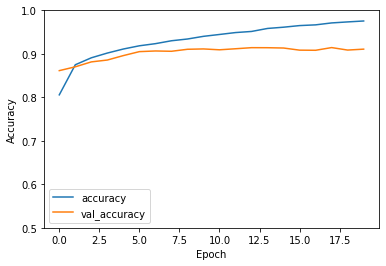

In [30]:
plt.plot(temp.history['accuracy'], label ='accuracy')
plt.plot(temp.history['val_accuracy'], label ='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend()
